In [253]:
using SparseArrays, LinearAlgebra
#using Pkg
#Pkg.activate("../")
using Causality

# Generation of Epidemics

In [254]:
T, N = 20.0, 300
#G = Causality.makeBarabasi(N,k=2)
#ρ = 3/N
#G = Causality.makeGNP(N,ρ)
G = Causality.makeProximity(N,2.4/N)
G.A 

300×300 SparseMatrixCSC{IndexedGraphs.NullNumber, Int64} with 2034 stored entries:
⠀⠀⠐⠐⡐⡲⠐⠰⠐⢀⠁⠤⣈⠔⠠⡀⣂⡅⣆⢀⠠⠐⡂⢠⢜⠐⡀⢀⢨⠘⠜⡅⠁⠁⠠⠡⣡⢖⠁⠆
⢐⠀⠀⡠⠂⣩⠨⢁⠒⡂⢁⢒⠜⣦⠁⠃⠮⠈⡔⠐⡊⠣⡒⡀⡆⠁⣋⣰⠌⡚⢈⠌⡘⢖⣊⠁⡈⠰⢂⠀
⢰⡨⡌⣠⠰⠂⠰⢠⠿⡁⠁⢅⠪⠰⢂⠌⠆⡥⡈⠁⠈⠀⠇⠉⡈⡑⡬⠈⠨⠱⡀⡂⠜⠀⢡⢀⣡⡾⠀⠁
⢐⡀⠆⢂⠐⣂⠁⠀⠐⠁⠬⣂⠐⠄⠍⡠⢖⢦⡲⣀⢀⠦⡂⡤⠈⣰⣉⠤⣦⠐⠢⡀⡂⠆⣂⠒⢀⠒⣈⠅
⠐⢀⠸⠠⠟⠣⠔⠀⠠⢂⡸⠡⠺⢀⢹⠁⠂⠊⠈⠃⠅⠉⢎⠀⠇⡐⡀⠳⠀⠖⠄⡘⡺⠰⢄⢐⢄⠺⠠⢐
⠁⡄⢡⢐⠅⢄⠢⢣⠖⡊⠀⠄⠨⠀⠐⠈⠍⠅⡨⠈⡌⡍⠐⠎⠀⠩⡚⠆⠨⠪⠐⡐⠇⢄⡌⠓⣡⠐⡕⠁
⢂⠜⠲⣥⢊⡂⠐⠄⠚⢂⠂⠂⠀⡠⢀⠊⣀⠂⡐⠡⠦⠂⠢⠄⢔⠀⣓⡵⠄⢒⢠⣉⡺⡴⠊⠒⠰⡐⠆⢈
⠀⠢⠥⠀⡈⠔⠃⡡⠗⠒⡐⠀⡠⠐⠀⢀⠠⠊⠀⣀⠔⢀⠙⠤⠀⣅⠤⠈⢀⠀⠀⠢⠎⠁⠀⠐⠡⠀⠠⠱
⠌⠼⡊⠃⠌⡥⠸⣕⡨⠀⠇⠅⠠⠘⡠⠂⠎⠁⠫⠀⠐⢅⡀⠯⠀⢊⠂⢀⢩⠨⠀⠇⠇⣁⢱⠥⡀⠁⢅⡤
⠈⢙⢐⠉⠆⠈⠘⢪⠦⠀⡂⠊⠔⡈⠀⢠⠋⠂⠀⡠⠲⠃⢀⢚⣁⠄⢑⠤⡷⠐⠕⠁⠀⣢⡆⠠⡊⠁⡤⡃
⢀⠂⠮⡈⠂⠀⠠⡔⡅⠁⡆⠭⠨⠃⠐⢁⠔⢄⠼⠂⠀⢀⠄⠘⠃⢠⠔⠈⢂⠣⢄⠈⠄⢄⠔⠤⠓⠀⠎⠎
⠈⣈⠘⠨⡍⠁⠈⡬⠊⠑⡰⠄⠈⠆⠓⡄⡤⡌⣠⢐⣀⠁⠪⡢⠀⠪⢂⠎⣤⠉⠣⠀⠞⠚⢎⠃⡱⡈⣓⣀
⢒⠑⠌⠉⢆⠨⢂⣠⢉⠡⡄⡀⠐⠑⠄⢤⡠⢀⠁⠜⠉⣀⡠⡀⠀⠀⠤⡙⢀⠁⡑⠀⠎⡀⡩⡂⢣⠉⡂⠂
⠀⢈⢋⣸⡂⠋⠃⡜⢤⡈⠺⠌⢝⡼⡀⠃⠈⢀⠑⡔⡐⠁⡨⠔⣄⠣⢮⠓⡴⣃⠤⡑⠃⢂⠄⢀⡚⢸⢘⠂
⣂⠒⣢⠡⢆⡂⢈⠛⢠⠄⡢⡂⢠⢁⠀⠐⡃⡒⢙⠋⠬⡐⡄⠛⠄⠐⠴⢫⠀⠀⢘⡠⡤⣀⡂⣐⡐⣠⠱⠀
⠖⠥⡂⠔⠠⠨⠈⠢⣀⠡⢐⠠⡄⢲⠠⡀⠤⠄⠕⠁⡀⠑⠉⠂⠑⠈⢄⠣⠒⡰⠠⠂⠀⡀⢆⠡⠦⢁⢀⢡
⠅⠀⢲⢌⠒⠁⠨⠌⢚⡊⠉⢅⢚⡮⠎⠁⠍⢡⠠⣠⠀⢅⣺⠁⠊⠡⠩⢀⠀⢫⠀⠠⠄⡡⡄⢅⠔⢐⣅⠌
⠄⡂⠎⠘⠁⢒⢨⠘⢀⢑⢦⠉⢪⠀⢀⠀⠕⡖⠈⡉⠐⡅⠮⠑⠣⠪⠀⢁⢈⢨⠌⡑⠄⢍⢀⡴⠘⠂⢑⢖
⢡⢞⢂⡈⣡⡾⢠⠐⣠⡑⢁⠚⢐⠢⠁⠂⠄⠈⠎⠈⠙⠀⡑⠪⡍⠒⣚⣈⠐⣨⠌⢃⢐⢁⠲⠀⠀⡤⢁⠅
⠡⠄⠈⠐⠄⠀⠆⠜⢀⢂⠕⠉⡈⢁⢄⡂⠁⡵⠤⠫⡪⠅⠙⢸⠨⠈⠲⠐⠑⠂⠄⣐⡁⠝⢱⢔⠅⠔⠠⠂

In [255]:
getpar(pseed,autoinf::GaussianRate,inf_in::GaussianRate) = 
    [fill(pseed, 1, N);
     fill(autoinf.a, 1, N); fill(autoinf.b, 1, N); fill(autoinf.c, 1, N);
     fill(inf_in.a,   1, N); fill(inf_in.b, 1, N); fill(inf_in.c, 1, N);
    ]

getpargen(pseed, autoinf::GaussianRate, inf_out::GaussianRate) = 
    [pseed autoinf.a autoinf.b autoinf.c inf_out.a inf_out.b inf_out.c]


getpargen (generic function with 1 method)

In [285]:
#Initialize generation parameters
ε = 1e-10
λ = 0.28
pseed = 1/N
autoinf = GaussianRate(ε, T/2, 1/ε)
inf_in = GaussianRate(1.0, T/2, 1/ε)
inf_out = GaussianRate(λ, T/2, 1/ε)

θp = getpar(pseed, autoinf, inf_in);
θpgen = getpargen(pseed, autoinf, inf_out);

In [286]:
#Initialize min/max boundaies
T = Float64(T)
pseed_min = ε
pseed_max = 1-ε
rate_min = GaussianRate(ε  ,  -T,   ε)
rate_max = GaussianRate(1/ε  ,  2T,   1/ε)

θmin = getpar(pseed_min , rate_min, rate_min);
θmax = getpar(pseed_max , rate_max, rate_max);

rate_min = GaussianRate(ε  ,  -T,   ε)
rate_max = GaussianRate(1/ε  ,  T,   T)

θgenmin = getpargen(pseed_min, rate_min, rate_min);
θgenmax = getpargen(pseed_max, rate_max, rate_max);

In [287]:
const Igen = GenerativeSI{GaussianRate,GaussianRate} 
const Igauss = GaussianInferentialSI

GaussianInferentialSI

In [296]:
Mp = StochasticModel(Igen, T, θp, G, θpgen);
sample! = Sampler(Mp);

xtrue = zeros(N)
sample!(xtrue)
nobs, p = Int(round(N/20)), 1e-5
#nobs, p = N, 1e-5
O = [(ti = T*(1+rand())/2; (i,xtrue[i] < ti,ti,p)) for i=1:nobs]
sum(xtrue .< T)

257

In [297]:
#Softened model
T = Float64(T)
ε = 2e-3
autoinf = GaussianRate(ε, T/2, T);
θp2gen = getpargen(pseed, autoinf, inf_out);
inf_in = GaussianRate(1., T/2, 3*T );

θp2 = getpar(pseed, autoinf, inf_in);
Mp2 = StochasticModel(Igen, T, θp2, G, θp2gen);

In [298]:
using IntervalUnionArithmetic
T = Float64(T)
mask = fill(IntervalUnion(0., T),N)
for o in O
    if o[2] == 1 
        mask[o[1]] = mask[o[1]] ∩ IntervalUnion(0., o[3])
    elseif o[2] == 0
        mask[o[1]] = mask[o[1]] ∩ IntervalUnion(o[3], T)
    end
end
struct MaskedInferentialSI <: SI end

Causality.individual(M::StochasticModel{MaskedInferentialSI}, i::Int, θi = @view(M.θ[:,i]), θg = M.θgen ) = 
@views IndividualSI(θi[1], 
    MaskedRate(GaussianRate(θi[2:4]...),mask[i]), 
    MaskedRate(GaussianRate(θi[5:7]...),mask[i]), 
    GaussianRate(θg[5:7]...))

## Causality 

In [299]:
θ = getpar(pseed, autoinf, inf_in);
M = StochasticModel(Igauss, T, θ, G, θp2gen);

In [300]:
using ProgressMeter
ProgressMeter.ijulia_behavior(:clear)
F = descend!(Mp2, O; M=M, numsamples=1000, numiters=100, 
         θmin=θmin, θmax=θmax,θgenmin=θgenmin, θgenmax=θgenmax, descender=SignDescender(0.1),
         hyperdescender=SignDescender(0.),learnhyper=1);
F = descend!(Mp2, O; M=M, numsamples=1000, numiters=40, 
         θmin=θmin, θmax=θmax,θgenmin=θgenmin, θgenmax=θgenmax, descender=SignDescender(0.01),
         hyperdescender=SignDescender(0.),learnhyper=1);
F

Progress: 100%|█████████████████████████████████████████| Time: 0:00:36
  F:  33.28005820937852


33.28005820937852

In [301]:
statscau = prior(M, numsamples=10000);

Progress: 100%|█████████████████████████████████████████| Time: 0:00:04


## SoftMarg

In [302]:
stats = softpost(Mp, O; numsamples=10^5)

Progress: 100%|█████████████████████████████████████████| Time: 0:00:58


1247×300 Matrix{Float64}:
  8.65305   7.1178    20.0     20.0     …   7.00177     7.97318    4.21581
  7.22501   6.60129   16.5551  16.5269      7.06607     3.02941    4.25996
 15.1503   12.7512    19.7685  20.0        14.5212      3.76665    5.82905
  2.68834   4.19204   18.8068  17.3543      0.0473044   1.98325    1.49484
 10.9026    8.65213   20.0     20.0         9.28766     4.97072    8.0771
  3.70198   1.62818   16.6723  16.7997  …   2.36254     4.54808    9.78625
  1.72908   2.11042   20.0     20.0         0.629409    9.28069    9.69135
  4.52733   0.379746  18.5811  18.8823      4.40937     3.21366    4.94157
  9.35608   7.35976   16.6595  15.8143      8.75222     5.12398   11.0451
  8.14576   1.57525   19.059   19.144       3.56574    10.2785     8.64094
  8.65174   3.89165   17.7796  17.3285  …   7.03866     7.39263   14.4902
 12.3601    7.30425   18.0907  17.5554      9.93973     2.65393    0.0
  7.52748   4.51974   17.4149  17.2495      6.0172      2.7731     9.32434
  ⋮   

## Sib

In [303]:
using PyCall
@pyimport sib
function sibyl(N, T_cont, Λ, O, γ, λ ; dt=1/5, maxit = 400, tol = 1e-14)
    
    T = Int(round(T_cont / dt))
    contacts = [(i-1,j-1,t, λ * dt) for t in 1:T for (i,j,v) in zip(findnz(Λ.A)...)];
    obs = [[(i,-1,t) for t=1:T for i=0:N-1];
           [(i-1,s,Int(round(t/dt))) for (i,s,t,p) in O]]
    sort!(obs, lt=((i1,s1,t1),(i2,s2,t2))->(t1<t2))
    prob_sus = 0.5
    prob_seed=γ
    pseed = prob_seed / (2 - prob_seed)
    psus = prob_sus * (1 - pseed)
    params = sib.Params(prob_r=sib.Exponential(mu=0), pseed=pseed, psus=psus,pautoinf=1e-10,fp_rate=1e-10,fn_rate=1e-10)
    f = sib.FactorGraph(contacts=contacts, observations=obs, params=params)
    sib.iterate(f, maxit=maxit,tol=tol)
    sib.iterate(f, maxit=maxit, damping=0.5, tol=tol)
    sib.iterate(f, maxit=maxit, damping=0.9, tol=tol)
    p_sib=[collect(n.bt) for n in f.nodes]
    m_sib = zeros(N, T)
    for i=1:N
        m_sib[i,1] = p_sib[i][1] 
        for t=2:T
            m_sib[i,t] = m_sib[i,t-1] + p_sib[i][t]
        end
    end 
    return m_sib
end


sibyl (generic function with 1 method)

In [304]:
a=time()
dt = 1/4
p_sib = sibyl(N, T, G, O, 1/N, λ; dt=dt, maxit = 40, tol = 1e-7);
b=time()
println(b-a)


sib.iterate(damp=0.0): 39/40 1.173e-01/1e-07      
sib.iterate(damp=0.5): 39/40 3.663e-02/1e-07      
88.891103982925420.9): 39/40 1.958e-02/1e-07      


# Heuristic

In [305]:
T = Float64(T)
struct HeuristicSI <: SI end
maskauto = fill(IntervalUnion(0., T),N)
maskinf = fill(IntervalUnion(0., T),N)
θfrench = getpar(pseed, GaussianRate(1e-10,T,T), inf_in);
Causality.individual(M::StochasticModel{HeuristicSI}, i::Int, θi = @view(M.θ[:,i]), θg = M.θgen ) = 
@views IndividualSI(θi[1], 
    MaskedRate(GaussianRate(θi[2:4]...),maskauto[i]), 
    MaskedRate(UnitRate(),maskinf[i]), 
    GaussianRate(θg[5:7]...),)


for o in O
    if o[2] == 1 
        maskauto[o[1]] = maskauto[o[1]] ∩ IntervalUnion(o[3]-5, T)        
        θfrench[2,o[1]] = 10
        θfrench[3,o[1]] = o[3] - 5
        θfrench[4,o[1]] = 10
    elseif o[2] == 0
        maskinf[o[1]] = maskinf[o[1]] ∩ IntervalUnion(o[3], T)
        θfrench[1,o[1]] = 1e-10
    end
end

Mfrench = StochasticModel(HeuristicSI, T, θfrench, G, θp2gen);
statsfre = prior(Mfrench,numsamples=10000);

Progress: 100%|█████████████████████████████████████████| Time: 0:00:06


## Metropolis Monte Carlo

In [306]:
K = Causality.GaussMove(2.0)
#stats_mh = Causality.metropolis_sampling_parallel(Mp, O, K; numsamples = 10^3,numsteps=10^3)
stats_mh = Causality.metropolis_sampling_sequential(Mp, O, K; numsamples = 10^3,numsteps=10^3);

Progress: 100%|█████████████████████████████████████████| Time: 0:00:09
  acc_ratio:  0.243


## Marginals and ROC curve

In [307]:
function marginal(i, t, stats)
    numsamp = size(stats,1)
    sum(stats[:,i] .< t)/numsamp
end

function tpr(xtrue, rank) 
    cumsum(xtrue[rank]) ./( cumsum(xtrue[rank])[end])
end

function fpr(xtrue, rank) 
    N = size(rank,1)
    return (range(1,N,length=N) .- cumsum(xtrue[rank])) ./ (range(1,N,length=N) .- cumsum(xtrue[rank]) )[end]
end

function ROC(xtrue, p)
    N = size(xtrue,1)
    rank = sortperm(p, rev=true)
    
    return fpr(xtrue, rank) , tpr(xtrue, rank)
end

function AUROC(ROC)
    N = size(ROC[1],1) 
    AU = 0
    for t = 1:N-1
        AU += ROC[2][t] * (ROC[1][t+1] - ROC[1][t])
    end
    return AU
end

AUROC (generic function with 1 method)

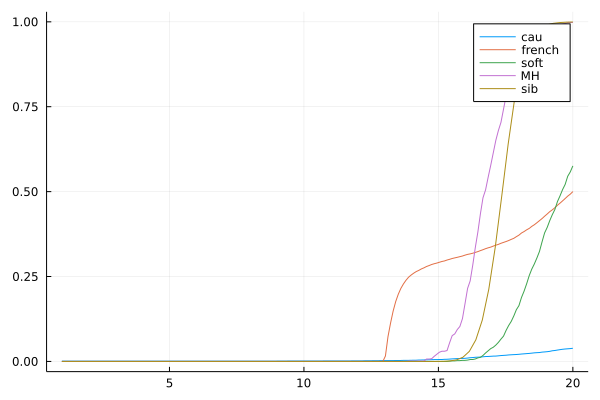

In [308]:
#Marginals
bins = 10 * Int(T)
using Plots
p_cau = zeros(N,bins)
p_french = zeros(N,bins)
p_mh = zeros(N,bins)
p_soft = zeros(N,bins)
for i = 1:N
    for t = 1:bins
       p_cau[i,t] = marginal(i, t*T/bins, statscau)
       p_french[i,t] = marginal(i, t*T/bins, statsfre)
       p_mh[i,t] = marginal(i, t*T/bins, stats_mh)
       p_soft[i,t] = marginal(i, t*T/bins, stats)
    end
end
i = 4
plot(LinRange(1,Int(T),bins),p_cau[i,:], label = "cau")
plot!(LinRange(1,Int(T),bins),p_french[i,:], label = "french")
plot!(LinRange(1,Int(T),bins),p_soft[i,:], label = "soft")
plot!(LinRange(1,Int(T),bins),p_mh[i,:], label = "MH")
plot!(LinRange(1,Int(T),Int(round(T/dt))),p_sib[i,:], label = "sib")

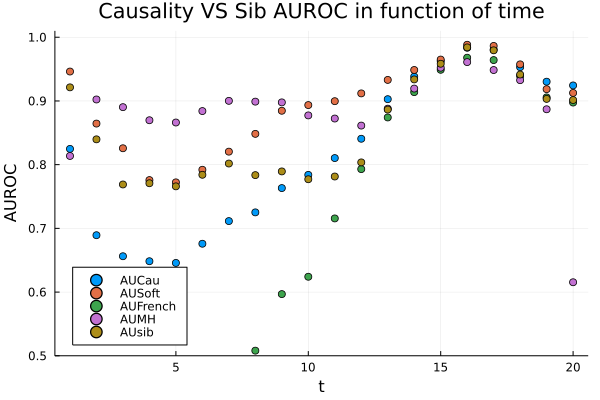

In [309]:
#AUROC curves

T = Int(T)
AU_curve=zeros(T)
AU_sib=zeros(T)
AU_french = zeros(T)
AU_soft = zeros(T)
AU_MH = zeros(T)
for t = 1:T
    cau_risk=zeros(N)
    sib_risk = zeros(N)
    french_risk = zeros(N)
    MH_risk = zeros(N)
    soft_risk = zeros(N)
    for i=1:N
       cau_risk[i] = marginal(i,t,statscau)
       french_risk[i] = marginal(i,t,statsfre)
       MH_risk[i] = marginal(i,t,stats_mh)
       sib_risk[i] = p_sib[i,Int(round(t/dt))]
       soft_risk[i] = marginal(i,t,stats) 
    end
    xt = xtrue .< t
    AU_soft[t] = AUROC(ROC(xt, soft_risk))
    AU_curve[t] = AUROC(ROC(xt, cau_risk))
    AU_french[t] = AUROC(ROC(xt, french_risk))
    AU_MH[t] = AUROC(ROC(xt, MH_risk))
    AU_sib[t] = AUROC(ROC(xt, sib_risk))
end

scatter(LinRange(1,T,T),AU_curve, label="AUCau", title="Causality VS Sib AUROC in function of time")
scatter!(LinRange(1,T,T),AU_soft, label="AUSoft",legend=:bottomleft)
scatter!(LinRange(1,T,T),AU_french, label="AUFrench")
scatter!(LinRange(1,T,T),AU_MH, label="AUMH")
scatter!(LinRange(1,T,T), AU_sib, label="AUsib")
xlabel!("t")
ylabel!("AUROC")
savefig("confronti.pdf")
ylims!(0.5,1.01)